<a href="https://colab.research.google.com/github/charu210703/ML-Lab-assignments/blob/main/UCS2604_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")


In [5]:
train_data.shape
train_data.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.shape
test_data.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.isnull().sum().head(10)


label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64

In [8]:
test_data.isnull().sum().head(10)



label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64

In [9]:
train_data.describe()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [10]:
test_data.describe()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print(train_data.columns)


Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [12]:
print(test_data.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [13]:
order = list(np.sort(train_data['label'].unique()))
print(order)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
1x5      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Length: 784, dtype: float64

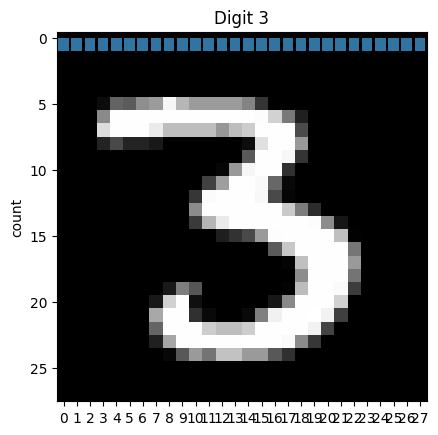

In [14]:
sns.countplot(train_data["label"])
img1 = train_data.iloc[876, 1:]
img1.shape
img1 = img1.values.reshape(28,28)
plt.imshow(img1, cmap='gray')
plt.title("Digit 8",)
img2 = train_data.iloc[12, 1:]
img2.shape
img2 = img2.values.reshape(28, 28)
plt.imshow(img2, cmap='gray')
plt.title("Digit 3")
round(train_data.drop('label', axis=1).mean(), 2)


In [15]:
y = train_data['label']
X = train_data.drop(columns = 'label')


In [16]:
print(train_data.shape)
X = X/255.0
test_data = test_data/255.0


(60000, 785)


In [17]:
print("X:", X.shape)
print("test_data:", test_data.shape)


X: (60000, 784)
test_data: (10000, 785)


In [18]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3 ,random_state = 10)

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize MLP classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4,
                        solver='adam', verbose=10, tol=1e-4, random_state=1,
                        learning_rate_init=.1)

# Fit the model
mlp_clf.fit(X_train, y_train)

# Predict
y_pred = mlp_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy:", accuracy)

Iteration 1, loss = 4.90355005
Iteration 2, loss = 2.72150902
Iteration 3, loss = 2.44175151
Iteration 4, loss = 2.08272405
Iteration 5, loss = 1.64516661
Iteration 6, loss = 1.32421430
Iteration 7, loss = 1.25949678
Iteration 8, loss = 1.09905974
Iteration 9, loss = 1.15354628
Iteration 10, loss = 1.14518802
Iteration 11, loss = 1.06280253
Iteration 12, loss = 1.06571387
Iteration 13, loss = 0.99227264
Iteration 14, loss = 1.06130185
Iteration 15, loss = 0.98867900
Iteration 16, loss = 0.89537167
Iteration 17, loss = 1.05143421
Iteration 18, loss = 1.02511632
Iteration 19, loss = 1.03184831
Iteration 20, loss = 0.89249786
Iteration 21, loss = 1.00577967
Iteration 22, loss = 0.90758284
Iteration 23, loss = 0.85952067
Iteration 24, loss = 0.83996059
Iteration 25, loss = 0.87251790
Iteration 26, loss = 0.85131490
Iteration 27, loss = 0.89967981
Iteration 28, loss = 0.90605953
Iteration 29, loss = 0.98068180
Iteration 30, loss = 0.92440667
Iteration 31, loss = 0.88729737
Iteration 32, los

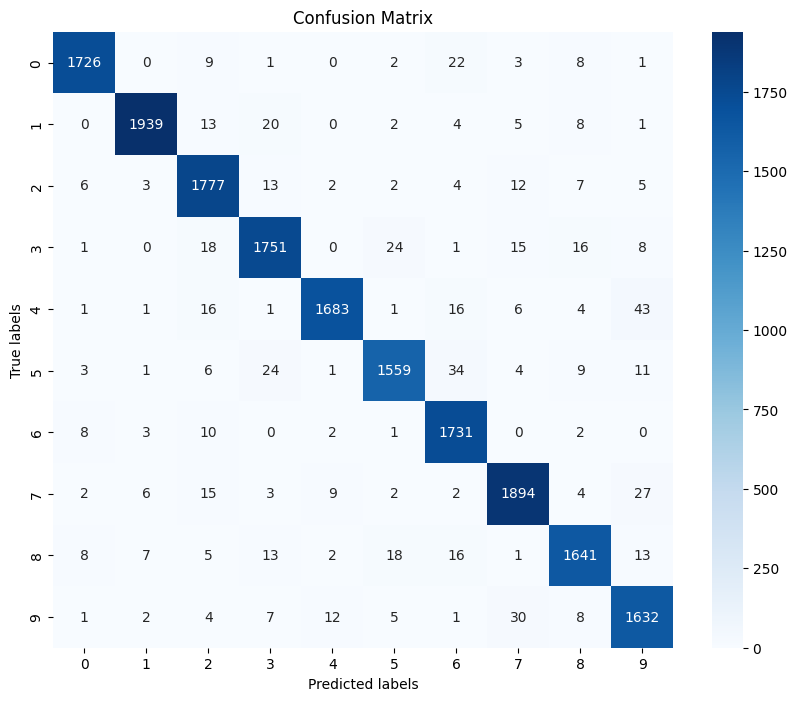

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=order, yticklabels=order)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()